In [202]:
#Load Data and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from sklearn.cluster import KMeans

In [203]:
#Loading the data set
df = pd.read_csv('Master_Data_Final.csv')
df

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2001,2001,°C,-0.569,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2002,2002,°C,1.640,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2003,2003,°C,2.536,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2004,2004,°C,2.744,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2005,2005,°C,0.172,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83397,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,Meteorological year,2016,2016,°C,1.140,Fc,Calculated data
83398,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,Meteorological year,2017,2017,°C,1.087,Fc,Calculated data
83399,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,Meteorological year,2018,2018,°C,1.077,Fc,Calculated data
83400,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,Meteorological year,2019,2019,°C,1.348,Fc,Calculated data


In [204]:
#observe all columns and find unique fields of Months and Element columns
# using display(df.info())

display(df.head(5))

display(df.Months.unique())

display(df.Element.unique())


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2001,2001,°C,-0.569,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2002,2002,°C,1.640,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2003,2003,°C,2.536,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2004,2004,°C,2.744,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,2005,2005,°C,0.172,Fc,Calculated data


array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

array(['Temperature change'], dtype=object)

In [205]:
#1. Renaming the Columns and few fields
df.rename(columns = {'Area':'Country'},inplace = True)
df.rename(columns = {'Area Code (FAO)':'Country_Code','Value':'Temp_Change'},inplace=True)
df.set_index('Months', inplace=True)
df.rename({'Dec–Jan–Feb':'Winter','Mar–Apr–May':'Spring','Jun–Jul–Aug':'Summer','Sep–Oct–Nov':'Fall'}, axis='index', inplace = True) 
df.reset_index(inplace = True)
df

,Months,Domain Code,Domain,Country_Code,Country,Element Code,Element,Months Code,Year Code,Year,Unit,Temp_Change,Flag,Flag Description
0,January,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,2001,2001,°C,-0.569,Fc,Calculated data
1,January,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,2002,2002,°C,1.640,Fc,Calculated data
2,January,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,2003,2003,°C,2.536,Fc,Calculated data
3,January,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,2004,2004,°C,2.744,Fc,Calculated data
4,January,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,2005,2005,°C,0.172,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83397,Meteorological year,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,2016,2016,°C,1.140,Fc,Calculated data
83398,Meteorological year,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,2017,2017,°C,1.087,Fc,Calculated data
83399,Meteorological year,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,2018,2018,°C,1.077,Fc,Calculated data
83400,Meteorological year,ET,Temperature change,5500,Oceania,7271,Temperature change,7020,2019,2019,°C,1.348,Fc,Calculated data


In [206]:
print(df.corr())

              Country_Code  Element Code   Months Code     Year Code  \
Country_Code  1.000000e+00           NaN  1.027796e-12  2.637618e-04   
Element Code           NaN           NaN           NaN           NaN   
Months Code   1.027796e-12           NaN  1.000000e+00  4.849359e-15   
Year Code     2.637618e-04           NaN  4.849359e-15  1.000000e+00   
Year          2.637618e-04           NaN  4.849359e-15  1.000000e+00   
Temp_Change   1.826056e-02           NaN -1.605776e-02  1.979757e-01   

                      Year  Temp_Change  
Country_Code  2.637618e-04     0.018261  
Element Code           NaN          NaN  
Months Code   4.849359e-15    -0.016058  
Year Code     1.000000e+00     0.197976  
Year          1.000000e+00     0.197976  
Temp_Change   1.979757e-01     1.000000  


In [207]:
#Dropping the unnecessary colums

df.drop(['Domain Code','Domain','Element Code','Element','Months Code', 'Year Code','Unit','Flag','Flag Description'],axis=1,inplace=True)
df

,Months,Country_Code,Country,Year,Temp_Change
0,January,2,Afghanistan,2001,-0.569
1,January,2,Afghanistan,2002,1.640
2,January,2,Afghanistan,2003,2.536
3,January,2,Afghanistan,2004,2.744
4,January,2,Afghanistan,2005,0.172
...,...,...,...,...,...
83397,Meteorological year,5500,Oceania,2016,1.140
83398,Meteorological year,5500,Oceania,2017,1.087
83399,Meteorological year,5500,Oceania,2018,1.077
83400,Meteorological year,5500,Oceania,2019,1.348


#display(df.iloc[250])

In [208]:
# Rearranging data frame

df= df[['Country_Code', 'Country','Year','Months','Temp_Change']]
df

,Country_Code,Country,Year,Months,Temp_Change
0,2,Afghanistan,2001,January,-0.569
1,2,Afghanistan,2002,January,1.640
2,2,Afghanistan,2003,January,2.536
3,2,Afghanistan,2004,January,2.744
4,2,Afghanistan,2005,January,0.172
...,...,...,...,...,...
83397,5500,Oceania,2016,Meteorological year,1.140
83398,5500,Oceania,2017,Meteorological year,1.087
83399,5500,Oceania,2018,Meteorological year,1.077
83400,5500,Oceania,2019,Meteorological year,1.348


In [209]:
print(df.corr())

              Country_Code      Year  Temp_Change
Country_Code      1.000000  0.000264     0.018261
Year              0.000264  1.000000     0.197976
Temp_Change       0.018261  0.197976     1.000000


df.to_csv("Temperature_final.csv", index = False)

Question : How is the Temperature change effecting the Seasons?

In [210]:
df0 = df[df['Country'] == 'World']
df_Winter = df0[df0['Months'] == 'Winter']
df_Spring = df0[df0['Months'] == 'Spring']
df_Summer = df0[df0['Months'] == 'Summer']
df_Fall = df0[df0['Months'] == 'Fall']


In [211]:
import plotly.graph_objects as go

# Adding traces to the graph subsequently
fig = go.Figure()
fig.add_trace(go.Scatter(x = df_Winter['Year'], y=df_Winter.Temp_Change,
                    mode='lines',
                    name='Winter'))
fig.add_trace(go.Scatter(x = df_Spring['Year'] , y=df_Spring.Temp_Change,
                    mode='markers',
                    name='Spring'))
fig.add_trace(go.Scatter(x = df_Summer['Year'] , y=df_Summer.Temp_Change,
                    mode='lines', name='Summer'))
fig.add_trace(go.Scatter(x = df_Fall['Year'] , y=df_Fall.Temp_Change,
                    mode='markers', name='Fall'))


fig.update_layout(
    title = "Effect of temperature on Seasons",
    xaxis_title = "Years",
    yaxis_title = "Temperature Change",
    legend_title= "Seasons",
    font=dict(
        family="Times New Roman",
        size=12,
        color="Black"
    )
)

fig.update_layout(
    title={
        'text': "Effect of temperature on Seasons",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)




We can observe from the above plot 
1.temperature change has been gradually increasing in the last 2 decades,
2.Observing the blue line graph, we can see that the regular winter months are getting hotter, which can be a cause for shift in the seasons.
3.Years 2016 and 2020 had the hottest winters in the last 2 decades.
4.Summers and Fall are also getting hotter and 2016 had the hottest spring so far.


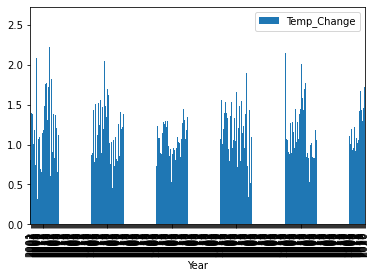

In [212]:
df0.plot(x="Year",y= "Temp_Change", kind="bar")
plt.show()

In [171]:
df_W = df[df['Country'] == 'World']
df_W.set_index("Months", inplace=True)
df_W= df_W.loc[['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December' ]]
df_W.reset_index(inplace = True)


fig = px.line_polar(df_W, r=df_W.Temp_Change, theta=df_W.Months, animation_frame='Year', line_close=True)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.5, 3]
    )),
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))


fig.show()

ref for polar charts: https://plotly.com/python/polar-chart/